In [83]:
%matplotlib inline

import pandas as pd
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from os import walk
from scipy import linalg
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Etude PCA sur les variables heli 

    Le but : Reprendre la PCA mais différenciant les types d'input : 
        
            - PCA héli : on exclue les variables environnementales : "altitude, air speed, static pressure, 
            outside temp".
            
            - PCA héli sans oil temp

In [8]:
path = '/Users/mayliscotadze/Documents/Safran/'

In [4]:
# Load file all_datas avec toutes les lignes de tous les fichiers

In [5]:
df = pd.read_csv(path + 'all_datas_cleaned.csv', sep=",", header=0, encoding="latin 1")
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [6]:
input = ["static pressure","air speed","rotation speed","outside temp","n2","n1","torque","turbine temp","oil pressure","oil temp","ground speed","altitude"]

In [9]:
df.head(3)

,time,phase,static pressure,air speed,rotation speed,outside temp,n2,n1,torque,turbine temp,oil pressure,oil temp,fuel vol,fuel flow,power,ground speed,altitude,n_vol
0,18:29:44.000000,0,1012.1,0,0,29,0,0.0,2.3,155,0.0,48,273.0,58.2,21.7,0.0,56.0,0001-3.csv
1,18:29:46.000000,0,1012.0,0,0,29,0,0.3,2.3,156,0.0,48,273.0,46.6,NaN,0.0,55.0,0001-3.csv
2,18:29:48.000000,0,1012.1,0,0,29,0,5.3,2.3,157,0.0,48,273.0,33.1,NaN,0.0,54.0,0001-3.csv


## PCA sur les variables heli (sans distinction de phase)

In [10]:
input_heli = ["rotation speed","n2","n1","torque","turbine temp","oil pressure","oil temp","ground speed"]

In [11]:
df1 = df[input_heli]

In [12]:
df1.head(3)

,rotation speed,n2,n1,torque,turbine temp,oil pressure,oil temp,ground speed
0,0,0,0.0,2.3,155,0.0,48,0.0
1,0,0,0.3,2.3,156,0.0,48,0.0
2,0,0,5.3,2.3,157,0.0,48,0.0


In [15]:
df1 = df1.apply(lambda x : x.astype(float))

In [17]:
df1.dtypes

rotation speed    float64
n2                float64
n1                float64
torque            float64
turbine temp      float64
oil pressure      float64
oil temp          float64
ground speed      float64
dtype: object

In [30]:
df1 = df1.dropna()

In [31]:
# Convert in numpy.array
array_1 = df1.as_matrix()

In [32]:
array_1.shape

(4588430, 8)

In [33]:
np.any(np.isnan(array_1)) , np.any(np.isinf(array_1))

(False, False)

In [34]:
# Recentring and rescaling data
array_1_scale = scale(array_1, axis=0)

In [41]:
pca = PCA(n_components=3).fit(array_1_scale)
X_pca = pca.transform(array_1_scale)

In [42]:
print("Eigenvalues Phase 1")
print(pca.explained_variance_)  

Eigenvalues Phase 1
[ 6.17729345  0.98634934  0.40063495]


In [43]:
print("Explained variance ratio")
print (pca.explained_variance_ratio_)

Explained variance ratio
[ 0.77216168  0.12329367  0.05007937]


In [44]:
print("Eigenvalues cumsum ")
print(pca.explained_variance_ratio_.cumsum())

Eigenvalues cumsum 
[ 0.77216168  0.89545535  0.94553472]


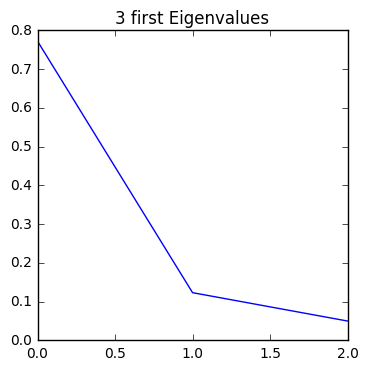

In [46]:
fig = plt.subplots(figsize=(4,4))
plt.plot(pca.explained_variance_ratio_)
plt.title('3 first Eigenvalues', fontsize = 12)

#### First PCA Components interpretation

Interpretation of the principal components is based on finding which variables are most strongly correlated with each component, i.e., which of these numbers are large in magnitude, the farthest from zero in either positive or negative direction. 

In [47]:
pca_comp = pd.DataFrame(pca.components_)
pca_comp.columns = input_heli

In [48]:
pca_comp2 = pca_comp.T

In [49]:
pca_comp2.columns = ['PC-1','PC-2','PC-3']

In [50]:
pca_comp2

,PC-1,PC-2,PC-3
rotation speed,-0.370912,-0.253722,-0.413496
n2,-0.372648,-0.261500,-0.423885
n1,-0.386422,-0.212841,-0.075552
torque,-0.360215,0.017393,0.642239
turbine temp,-0.377369,-0.094198,0.400675
oil pressure,-0.391740,0.033238,0.006447
oil temp,0.205216,-0.819993,0.264027
ground speed,-0.326342,0.373193,0.029527


##### First Principal Component Analysis - PCA1

In [51]:
pca1 = pca_comp2[['PC-1']]

In [52]:
pca1_sorted = pca1.abs().stack().sort_values(kind="quicksort", ascending = False)

In [53]:
print('Correlation entre la composante principale 1 et les inputs :\n')
print(pca1_sorted)

Correlation entre la composante principale 1 et les inputs :

oil pressure    PC-1    0.391740
n1              PC-1    0.386422
turbine temp    PC-1    0.377369
n2              PC-1    0.372648
rotation speed  PC-1    0.370912
torque          PC-1    0.360215
ground speed    PC-1    0.326342
oil temp        PC-1    0.205216
dtype: float64


##### Second Principal Component Analysis - PCA2

In [54]:
pca2 = pca_comp2[['PC-2']]
pca2_sorted = pca2.abs().stack().sort_values(kind="quicksort", ascending = False)
print('Correlation entre la composante principale 2 et les inputs :\n')
print(pca2_sorted)

Correlation entre la composante principale 2 et les inputs :

oil temp        PC-2    0.819993
ground speed    PC-2    0.373193
n2              PC-2    0.261500
rotation speed  PC-2    0.253722
n1              PC-2    0.212841
turbine temp    PC-2    0.094198
oil pressure    PC-2    0.033238
torque          PC-2    0.017393
dtype: float64


#### Third Principal Component Analysis - PCA3

In [55]:
pca3 = pca_comp2[['PC-3']]
pca3_sorted = pca3.abs().stack().sort_values(kind="quicksort", ascending = False)
print('Correlation entre la composante principale 3 et les inputs :\n')
print(pca3_sorted)

Correlation entre la composante principale 3 et les inputs :

torque          PC-3    0.642239
n2              PC-3    0.423885
rotation speed  PC-3    0.413496
turbine temp    PC-3    0.400675
oil temp        PC-3    0.264027
n1              PC-3    0.075552
ground speed    PC-3    0.029527
oil pressure    PC-3    0.006447
dtype: float64


In [56]:
def circleOfCorrelations(pc_infos):
    plt.figure(figsize=(5,5))
    plt.Circle((0,0),radius=10, color='g', fill=False)
    circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
    fig = plt.gcf()
    fig.gca().add_artist(circle1)
    for idx in range(len(pc_infos["PC-1"])):
        x = pc_infos["PC-1"][idx]
        y = pc_infos["PC-2"][idx]
        plt.plot([0.0,x],[0.0,y],'-', lw=1)
        plt.plot(x, y, 'kx')
        plt.annotate(pc_infos.index[idx], xy=(x,y), fontsize = 10, horizontalalignment='right',verticalalignment='top')
    plt.xlim((-1,1))
    plt.xlabel('PCA-1', fontsize = 12)
    plt.ylim((-1,1))
    plt.ylabel('PCA-2', fontsize = 12)
    plt.title("Circle of Correlations on PCA-1 and PCA-2", fontsize = 12)
    

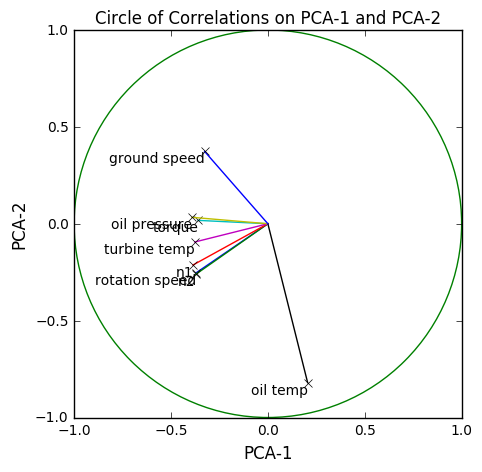

In [57]:
circleOfCorrelations(pca_comp2)

    On remarque que oil temp se démarque des autres variables 

# Zoom = PCA sans oil temp

In [94]:
df2 = df1.drop('oil temp', axis=1)

In [95]:
df2.head(3)

,rotation speed,n2,n1,torque,turbine temp,oil pressure,ground speed
0,0.0,0.0,0.0,2.3,155.0,0.0,0.0
1,0.0,0.0,0.3,2.3,156.0,0.0,0.0
2,0.0,0.0,5.3,2.3,157.0,0.0,0.0


In [99]:
array_2 = df2.as_matrix()
array_1_scale = scale(array_2, axis=0)
pca = PCA(n_components=2).fit(array_1_scale)
X_pca = pca.transform(array_1_scale)

In [100]:
print("Eigenvalues Phase 1")
print(pca.explained_variance_)  
print("Explained variance ratio")
print (pca.explained_variance_ratio_)
print("Eigenvalues cumsum ")
print(pca.explained_variance_ratio_.cumsum())

Eigenvalues Phase 1
[ 5.95052715  0.51375496]
Explained variance ratio
[ 0.85007531  0.07339357]
Eigenvalues cumsum 
[ 0.85007531  0.92346887]


In [102]:
pca_comp = pd.DataFrame(pca.components_)
pca_comp.columns = ["rotation speed","n2","n1","torque","turbine temp","oil pressure","ground speed"]
pca_comp2 = pca_comp.T
pca_comp2.columns = ['PC-1','PC-2']
pca1 = pca_comp2[['PC-1']]
pca1_sorted = pca1.abs().stack().sort_values(kind="quicksort", ascending = False)
print('Correlation entre la composante principale 1 et les inputs :\n')
print(pca1_sorted)

Correlation entre la composante principale 1 et les inputs :

n1              PC-1    0.398018
oil pressure    PC-1    0.396521
turbine temp    PC-1    0.386919
n2              PC-1    0.384822
rotation speed  PC-1    0.383162
torque          PC-1    0.367355
ground speed    PC-1    0.323721
dtype: float64


In [103]:
pca2 = pca_comp2[['PC-2']]
pca2_sorted = pca2.abs().stack().sort_values(kind="quicksort", ascending = False)
print('Correlation entre la composante principale 2 et les inputs :\n')
print(pca2_sorted)

Correlation entre la composante principale 2 et les inputs :

ground speed    PC-2    0.656208
n2              PC-2    0.433970
rotation speed  PC-2    0.397887
torque          PC-2    0.381894
n1              PC-2    0.243998
turbine temp    PC-2    0.126238
oil pressure    PC-2    0.037853
dtype: float64


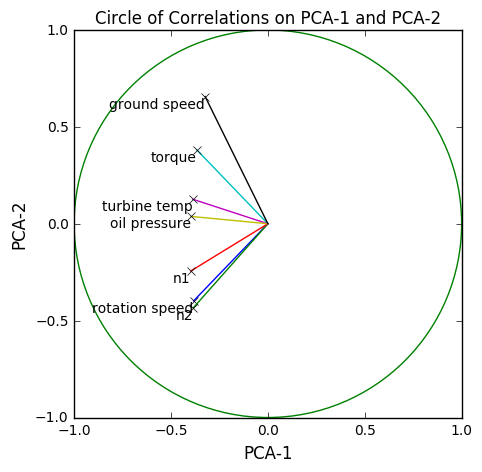

In [104]:
circleOfCorrelations(pca_comp2)